In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

accidents = pd.read_csv("./accidents.csv")
autos = pd.read_csv("autos.csv")
concrete = pd.read_csv("concrete.csv")
customer = pd.read_csv("customer.csv")


In [9]:
autos.columns

Index(['symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'stroke_ratio', 'displacement'],
      dtype='object')

In [3]:
autos["stroke_ratio"] = autos.stroke / autos.bore
autos[["stroke", "bore", "stroke_ratio"]].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


In [8]:
autos["displacement"] = np.pi *( 0.5 * autos.bore ** 2) * autos.stroke * autos.num_of_cylinders

<Axes: xlabel='LogWindSpeed', ylabel='Density'>

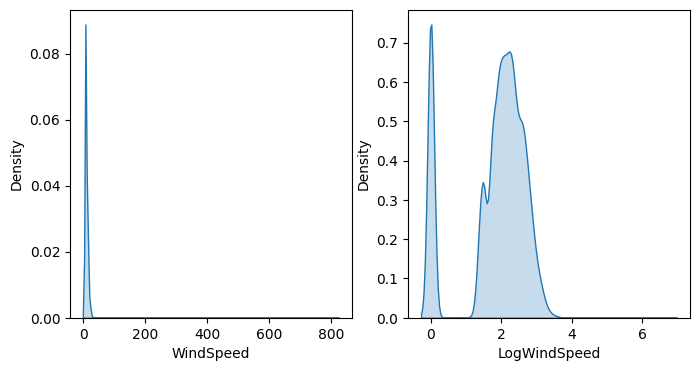

In [14]:
accidents["LogWindSpeed"] = accidents.WindSpeed.apply(np.log1p)

fix, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents.WindSpeed, fill=True, ax=ax[0])
sns.kdeplot(accidents.LogWindSpeed, fill=True, ax=ax[1])

In [19]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]
accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)

In [26]:
accidents[accidents.RoadwayFeatures >= 1]

,Severity,StartTime,EndTime,StartLat,StartLng,Distance,Street,City,State,Zipcode,...,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,LogWindSpeed,RoadwayFeatures
5,3,2020-04-23 15:17:17,2020-04-23 16:02:17,39.611810,-86.485780,0.000,I-70 W,Clayton,IN,46118,...,True,False,False,False,False,False,False,False,2.302585,1
7,2,2018-06-26 08:52:32,2018-06-26 09:22:17,35.087444,-80.811920,0.000,Pineville-Matthews Rd,Charlotte,NC,28226,...,False,False,False,False,False,False,False,True,0.000000,2
8,2,2017-09-08 14:59:56,2017-09-08 15:44:42,42.525745,-71.102211,0.000,Main St,Reading,MA,1867,...,False,False,False,False,False,False,False,True,2.322388,2
13,2,2018-02-26 14:11:25,2018-02-26 14:41:11,41.229465,-95.947044,0.000,Vinton St,Omaha,NE,68105,...,False,False,False,False,False,False,False,True,2.906901,2
20,2,2019-12-02 17:22:31,2019-12-02 18:22:14,35.435120,-97.565552,0.000,SW 29th St,Oklahoma City,OK,73119,...,False,False,False,False,False,False,False,True,2.079442,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99980,2,2018-03-22 13:08:41,2018-03-22 19:08:41,34.059710,-118.164950,0.188,W Ramona Blvd,Monterey Park,CA,91754,...,True,False,False,False,False,False,False,False,0.000000,1
99989,3,2017-01-13 15:32:12,2017-01-13 21:32:12,37.702270,-121.745060,0.479,I-580 E,Livermore,CA,94551,...,True,False,False,False,False,False,False,False,1.916923,1
99990,2,2018-02-16 12:15:20,2018-02-16 12:45:05,35.229420,-80.924614,0.000,Boyer St,Charlotte,NC,28208,...,False,False,False,False,False,False,False,True,2.906901,1
99994,2,2019-09-08 00:41:00,2019-09-08 01:53:15,38.663579,-121.292268,0.000,Madison Ave,Fair Oaks,CA,95628,...,False,False,False,False,False,False,False,True,2.079442,1


In [27]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]

concrete["Components"]  = concrete[components].gt(0).sum(axis=1)
concrete[components + ["Components"]].head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5


In [28]:
customer[["Type", "Level"]] = (

    customer["Policy"].str.split(" ", expand=True)

)

customer[["Policy", "Type", "Level"]]

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
...,...,...,...
9129,Personal L1,Personal,L1
9130,Corporate L3,Corporate,L3
9131,Corporate L2,Corporate,L2
9132,Personal L2,Personal,L2


In [30]:
autos["make_and_style"] = autos["make"] + "_" + autos["body_style"]
autos[["make_and_style", "make", "body_style"]]

,make_and_style,make,body_style
0,alfa-romero_convertible,alfa-romero,convertible
1,alfa-romero_convertible,alfa-romero,convertible
2,alfa-romero_hatchback,alfa-romero,hatchback
3,audi_sedan,audi,sedan
4,audi_sedan,audi,sedan
...,...,...,...
188,volvo_sedan,volvo,sedan
189,volvo_sedan,volvo,sedan
190,volvo_sedan,volvo,sedan
191,volvo_sedan,volvo,sedan


In [32]:
customer["AverageIncome"] = (
    customer.groupby("State") # for each state
    ["Income"] # select the income
    .transform("mean")
)

customer[["State", "Income", "AverageIncome"]]

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
...,...,...,...
9129,California,71941,37558.946667
9130,California,21604,37558.946667
9131,California,0,37558.946667
9132,California,21941,37558.946667


In [33]:
customer["StateFreq"] = (

    customer.groupby("State")["State"].transform("count") / customer.State.count()
    
)

In [34]:
customer[["State", "StateFreq"]]

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
...,...,...
9129,California,0.344865
9130,California,0.344865
9131,California,0.344865
9132,California,0.344865


In [37]:
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

df_train["AverageClaim"] = df_train.groupby("Coverage")["ClaimAmount"].transform("mean")

df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(), on="Coverage", how="left"
)

In [38]:
df_valid[["Coverage", "AverageClaim"]]

,Coverage,AverageClaim
0,Basic,383.679395
1,Premium,638.505636
2,Basic,383.679395
3,Basic,383.679395
4,Extended,483.302160
...,...,...
4562,Basic,383.679395
4563,Extended,483.302160
4564,Extended,483.302160
4565,Basic,383.679395
